In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from configs import *
import pandas as pd
from data import *
from analysis import *
from paper_figures import *
from paper_tables import *

In [3]:
save_figs = True

In [4]:
df = pd.read_pickle('data/experiment_results.pickle.xz', compression='xz')
df = process_big_df(df.copy())

In [5]:
df_sweep = process_sweep_df(df.query("hparams=='sweep'"))

In [6]:
multipliers = np.linspace(2,20,90)
df_sweep_mults = process_sweep_df(df.query("hparams=='sweep'"), trunc=multipliers)

In [7]:
df

dataset hparams warmup   decay   width  depth  \
0        rw    base  short  kaplan  1312.0   26.0   
1        rw    base  short  kaplan   832.0   21.0   
2        rw    base  short  kaplan  1024.0   23.0   
3        rw    base  short  kaplan   704.0   18.0   
4        rw    base   long  kaplan  1504.0   30.0   
..      ...     ...    ...     ...     ...    ...   
982    owt2    seed  short   const   480.0   12.0   
983    owt2    seed  short   const   480.0   12.0   
984    owt2    seed  short   const   480.0   12.0   
985    owt2    seed  short   const   480.0   12.0   
986    owt2    seed  short   const   480.0   12.0   

                                              val/loss  \
0    step
26       8.273299
52       7.264460
104  ...   
1    step
36       7.209037
72       6.616290
144  ...   
2    step
46       7.214812
92       6.445248
184  ...   
3    step
54       6.982597
107      6.311456
214  ...   
4    step
18      8.982249
36      8.261229
71     ...   
..                                                 ...   
982  step
3491     3.578323
6982     3.449981
13909...   
983  step
3491     3.618997
6982     3.463371
13909...   
984  step
3491     3.592875
6982     3.448364
13909...   
985  step
1746     3.784541
3491     3.574042
5040 ...   
986  step
3491     3.588631
6982     3.446768
13909...   

                                          val/loss_std  \
0    step
26       0.001030
52       0.001519
104  ...   
1    step
36       0.001431
72       0.001538
144  ...   
2    step
46       0.001484
92       0.001583
184  ...   
3    step
54       0.001568
107      0.001525
214  ...   
4    step
18      0.000969
36      0.001106
71     ...   
..                                                 ...   
982  step
3491     0.002134
6982     0.002143
13909...   
983  step
3491     0.002187
6982     0.002132
13909...   
984  step
3491     0.002187
6982     0.002127
13909...   
985  step
1746     0.002292
3491     0.002166
5040 ...   
986  step
3491     0.002202
6982     0.002161
13909...   

                                            train/loss  \
0    step
20       9.578757
40       8.079118
60   ...   
1    step
20       8.892697
40       7.436884
60   ...   
2    step
20       9.301204
40       7.688476
60   ...   
3    step
20       9.452538
40       7.725835
60   ...   
4    step
20      9.816062
40      8.545821
60     ...   
..                                                 ...   
982  step
20       9.114862
40       7.545253
60   ...   
983  step
20       9.093253
40       7.576393
60   ...   
984  step
20       9.114104
40       7.536318
60   ...   
985  step
20       9.106876
40       7.513043
60   ...   
986  step
20       9.179517
40       7.557418
60   ...   

                                      train/batch_time  ...   params_all  \
0    step
20       1.779191
40       1.361588
60   ...  ...  672079872.0   
1    step
20       0.682528
40       0.471070
60   ...  ...  260063232.0   
2    step
20       0.844221
40       0.625263
60   ...  ...  394788864.0   
3    step
20       0.499740
40       0.359278
60   ...  ...  179503104.0   
4    step
20      2.452952
40      1.816782
60     ...  ...  969105408.0   
..                                                 ...  ...          ...   
982  step
20       0.645117
40       0.569670
60   ...  ...   82575360.0   
983  step
20       0.641214
40       0.574205
60   ...  ...   82575360.0   
984  step
20       0.643140
40       0.571141
60   ...  ...   82575360.0   
985  step
20       0.642918
40       0.571866
60   ...  ...   82575360.0   
986  step
20       0.639948
40       0.570177
60   ...  ...   82575360.0   

    flops_per_token_att_no_embed flops_per_token_att flops_per_token_cc  \
0                   3.693920e+09        4.090921e+09       4.459618e+09   
1                   1.288176e+09        1.539932e+09       1.729344e+09   
2                   2.062025e+09        2.371879e+09       2.626812e+09   
3                   8.369603e+08        1.049985e+09       1.16

## Processing dfs - main analysis

In [19]:
# takes about ~28 minutes, mainly due to loss curve fitting. skip this if you want to save time and load the precomputed results
summary_df = perform_main_analysis(df, FIGURE1_CONFIGS)
# summary_df_att = perform_main_analysis(df, ATTENTION_ACCOUNTING_CONFIGS)
# summary_df_kaplan_tuned_hparams = perform_main_analysis(df, [('rw', 'tuned', 'long', 'const', 'kaplan', 'train')])
# summary_df_owt2 = perform_main_analysis(df, FIGURE1_CONFIGS_OWT2)


In [23]:
# # reluctantly pickling because they jammed series into a single cell
summary_df.to_pickle('data/summary_df-wd.pickle.xz', compression='xz')
# summary_df_att.to_pickle('data/summary_df_att.pickle.xz', compression='xz')
# summary_df_kaplan_tuned_hparams.to_pickle('data/summary_df_kaplan_tuned_hparams.pickle.xz', compression='xz')
# summary_df_owt2.to_pickle('data/summary_df_owt2.pickle.xz', compression='xz')

In [8]:
# loading the dataframes (instead of running the above cells)
summary_df = pd.read_pickle('data/summary_df-wd.pickle.xz', compression='xz')
summary_df_att = pd.read_pickle('data/summary_df_att.pickle.xz', compression='xz')
summary_df_kaplan_tuned_hparams = pd.read_pickle('data/summary_df_kaplan_tuned_hparams.pickle.xz', compression='xz')
summary_df_owt2 = pd.read_pickle('data/summary_df_owt2.pickle.xz', compression='xz')

In [9]:
pd.options.display.max_colwidth = 1000
summary_df['fit_results']

0    {'basic': {'d_exponent': 0.25867416467771337, 'd_coef': 0.0002931657763621121, 'd_r2': 0.993712383853307, 'w_exponent': 0.2990327307949821, 'w_coef': 0.002179859114042807, 'w_r2': 0.9970203533684123, 't_exponent': 0.16673922540272096, 't_coef': 3623078.6053533717, 't_r2': 0.975699844232203, 'multiplier_exponent': -0.6665215491945581, 'multiplier_coef': 78760191483416.23, 'multiplier_r2': 0.9938041515143997, 'A': 1306.6118282247014, 'E': 2.6567353675665983, 'alpha': 0.17481206620324652}, 'weighted': {'d_exponent': 0.25867416467771337, 'd_coef': 0.0002931657763621121, 'd_r2': 0.993712383853307, 'w_exponent': 0.2990327307949821, 'w_coef': 0.002179859114042807, 'w_r2': 0.9970203533684123, 't_exponent': 0.16424746621463476, 't_coef': 4016089.8921302874, 't_r2': 0.9754529309919436, 'multiplier_exponent': -0.671505067570726, 'multiplier_coef': 96773868130009.14, 'multiplier_r2': 0.9937411956617563, 'A': 148.4131591025766, 'E': 1.0, 'alpha': 0.1}, 'bootstrap': [{'A': 1150.6406713934123, '

In [10]:
summary_df_og = pd.read_pickle('data/summary_df.pickle.xz', compression='xz')
summary_df_og['fit_results']

0    {'basic': {'n_exponent': 0.8337679322841748, 'n_coef': 4.509820786815405e-08, 'n_r2': 0.9989931359359806, 't_exponent': 0.16518268679682296, 't_coef': 3850604.7408860405, 't_r2': 0.9756127569225297, 'multiplier_exponent': -0.6675358645683488, 'multiplier_coef': 81946457034242.53, 'multiplier_r2': 0.9937499053311882, 'A': 1322.3534107405858, 'E': 2.6599070063616916, 'alpha': 0.1751780689789408}, 'weighted': {'n_exponent': 0.8353000424913991, 'n_coef': 4.2319659184965657e-08, 'n_r2': 0.9989890950675456, 't_exponent': 0.16336684877863022, 't_coef': 4152787.256480985, 't_r2': 0.9754664690735759, 'multiplier_exponent': -0.6706000849827974, 'multiplier_coef': 93060295359421.58, 'multiplier_r2': 0.9937248216965986, 'A': 148.4131591025766, 'E': 1.0, 'alpha': 0.1}, 'bootstrap': [{'A': 1588.5474323305773, 'E': 2.7088336058459275, 'alpha': 0.1807897023476104}, {'A': 1600.9893311242183, 'E': 2.707220341024302, 'alpha': 0.18094363235847713}, {'A': 1178.0436749639969, 'E': 2.6282703353353885, '

# Figures

### Weights Figures
First plotting the fits for each law

In [12]:
row = 4 # Chinchilla-like, achieved with constant LR but optimizer tuning. Row 3 achieves similar with cosine decay.
# plt.plot(summary_df['optimal_pairs'])

In [ ]:
summary_df['data'][row]

### Plotting optimal depth-width ratios

In [14]:
summary_df['optimal_pairs'][row]['w']/summary_df['optimal_pairs'][row]['d']

0     33.276970
1     37.301592
2     35.556348
3     36.633120
4     38.955487
5     39.313177
6     42.396782
7     41.692499
8     38.453244
9     42.854209
10    43.570874
11    49.940047
dtype: float64

In [44]:
summary_df['data'][4]['orig_w']/summary_df['data'][4]['orig_d']

0                                                                                                             0    32.000000
1    32.000000
2    32.000000
3    37.333333
4    36.000000
5    35.555556
6    38.400000
7    40.000000
dtype: float64
1                                                                                              0    32.000000
1    32.000000
2    32.000000
3    37.333333
4    36.000000
5    35.555556
6    38.400000
7    40.000000
8    41.142857
dtype: float64
2                                                                               0    32.000000
1    32.000000
2    32.000000
3    37.333333
4    36.000000
5    35.555556
6    38.400000
7    40.000000
8    41.142857
9    42.666667
dtype: float64
3     0     32.000000
1     32.000000
2     37.333333
3     36.000000
4     35.555556
5     38.400000
6     40.000000
7     41.142857
8     42.666667
9     39.111111
10    39.619048
11    44.521739
12    43.076923
13    50.133333
dtype: float64
4                   

133.46142563212183

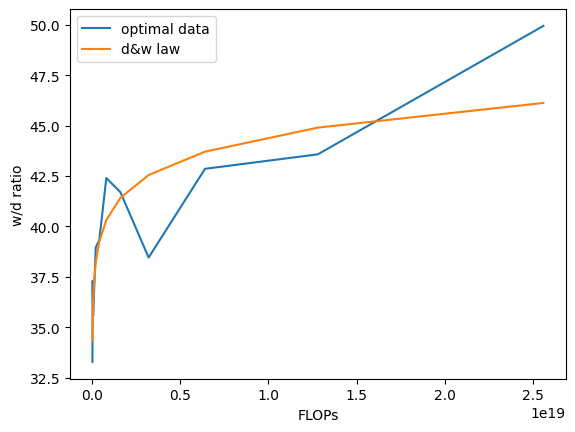

In [53]:
law_params = summary_df['fit_results'][4]['bs_median_weighted']
flops_pts = summary_df['optimal_pairs'][row]['flops']

plt.plot(flops_pts, summary_df['optimal_pairs'][row]['w']/summary_df['optimal_pairs'][row]['d'])
plt.plot(flops_pts, law_params['w_coef'] * flops_pts ** law_params['w_exponent'] / law_params['d_coef'] / flops_pts ** law_params['d_exponent'])
plt.xlabel('FLOPs')
plt.ylabel('w/d ratio')
plt.legend(['optimal data', 'd&w law'])

x = 2*10**31
law_params['w_coef'] * x ** law_params['w_exponent'] / law_params['d_coef'] / x ** law_params['d_exponent']

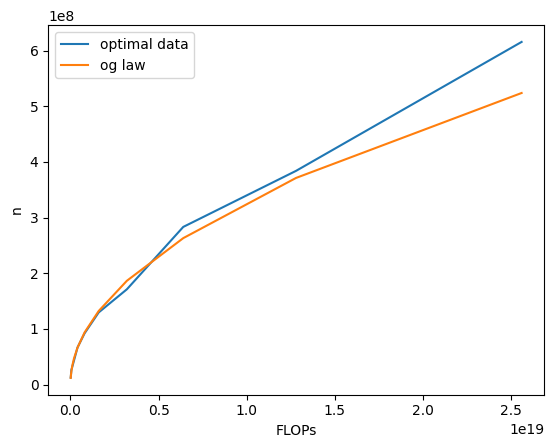

In [29]:
law_params = summary_df_og['fit_results'][4]['bs_median_weighted']
flops_pts = summary_df_og['optimal_pairs'][row]['flops']

plt.plot(flops_pts, summary_df['optimal_pairs'][row]['n'])
plt.plot(flops_pts, law_params['n_coef'] * flops_pts ** law_params['n_exponent'])
plt.xlabel('FLOPs')
plt.ylabel('n')
plt.legend(['optimal data', 'og law'])

# OG Paper figures

## Figure 1

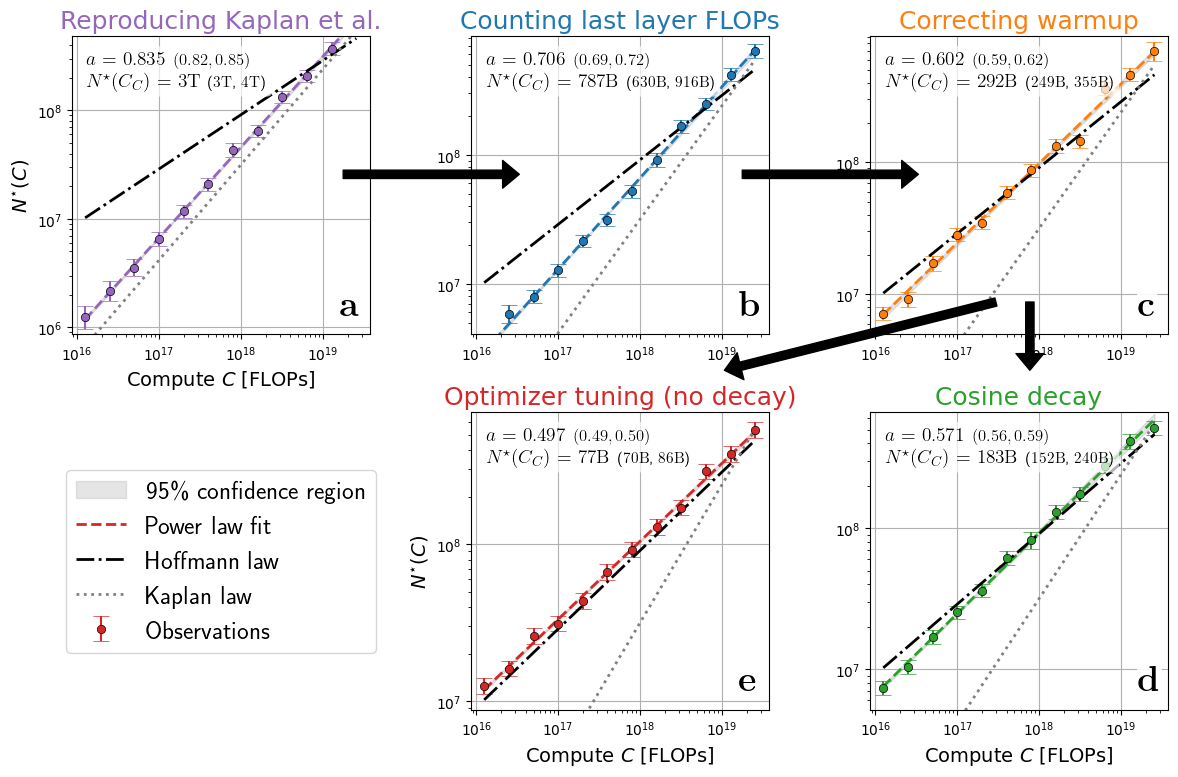

In [35]:
figure1(summary_df_og, save=save_figs)
plt.show()

## Warmup evidence

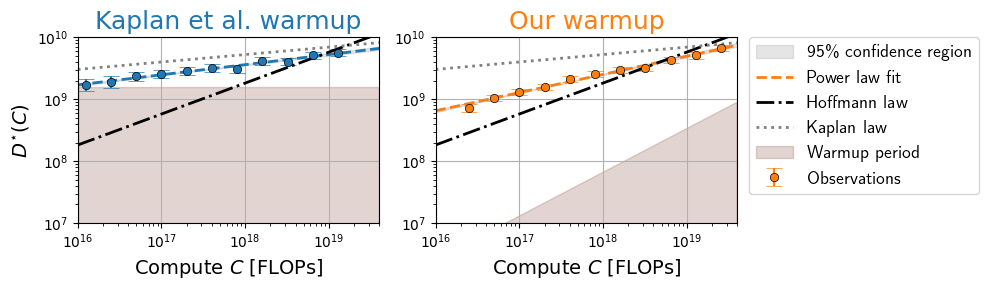

In [36]:
warm_evidence_figure(summary_df_og, save=save_figs)

## IsoFLOP curves

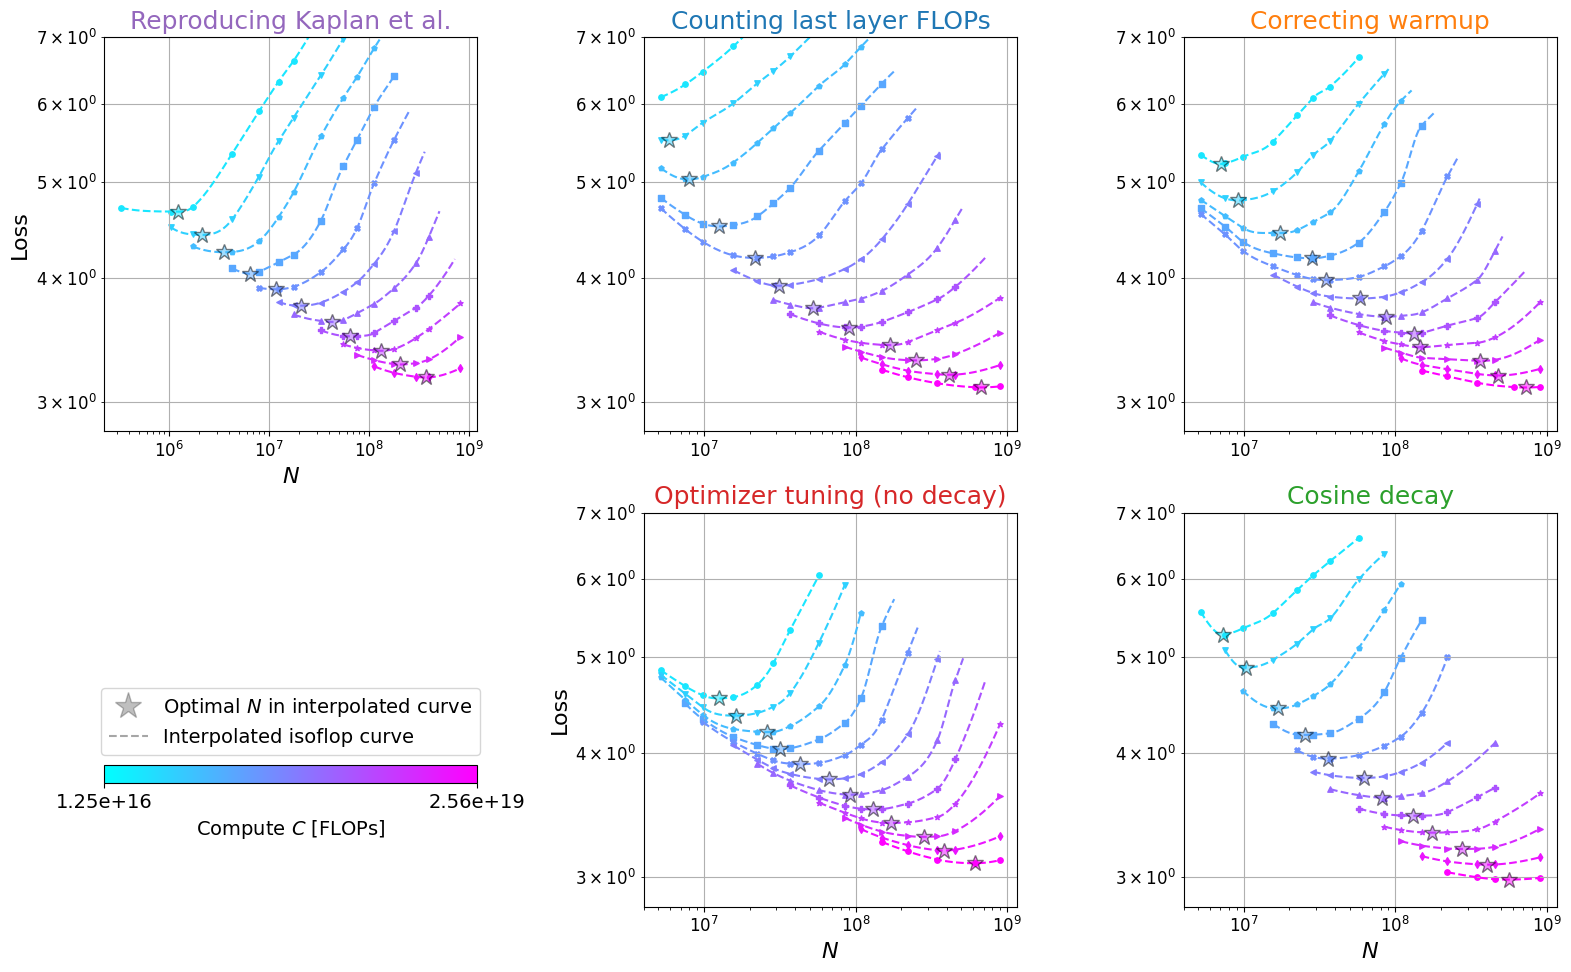

In [18]:
isoflop_loss_figure(summary_df, save=save_figs, configs_to_show=None)
plt.show()

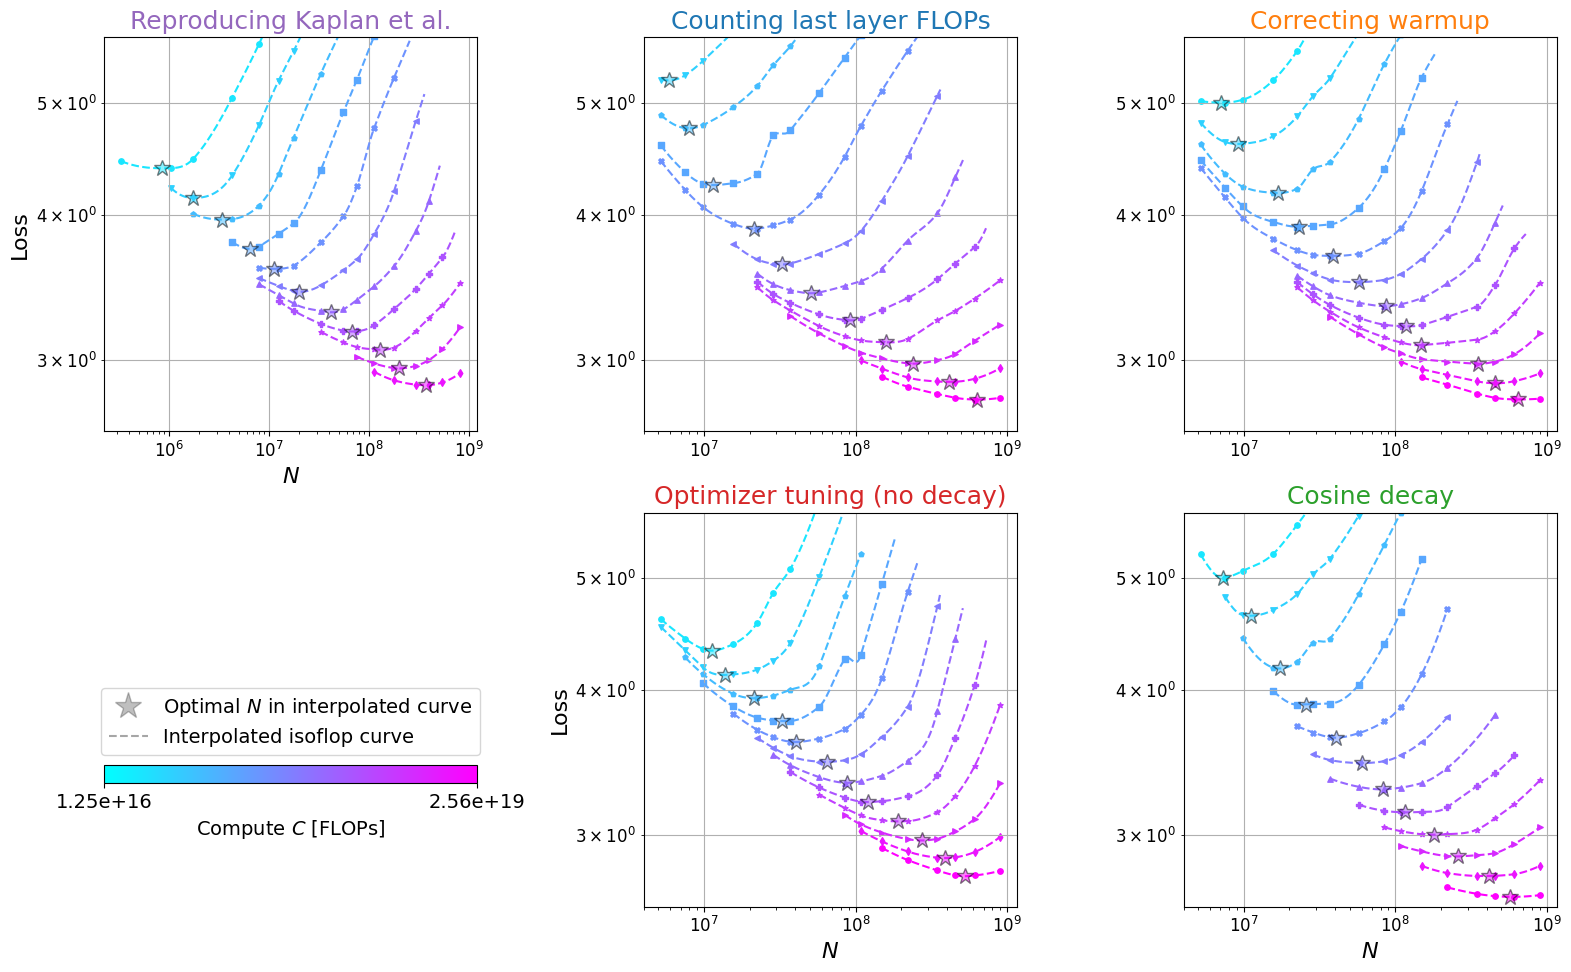

In [15]:
isoflop_loss_figure(summary_df_owt2, save=save_figs, configs_to_show=FIGURE1_CONFIGS_OWT2, save_path='figures/IsoFLOP-curves-owt2.pdf', ylim=[2.6,5.7])
plt.show()

## Different datasets and FLOP counts 

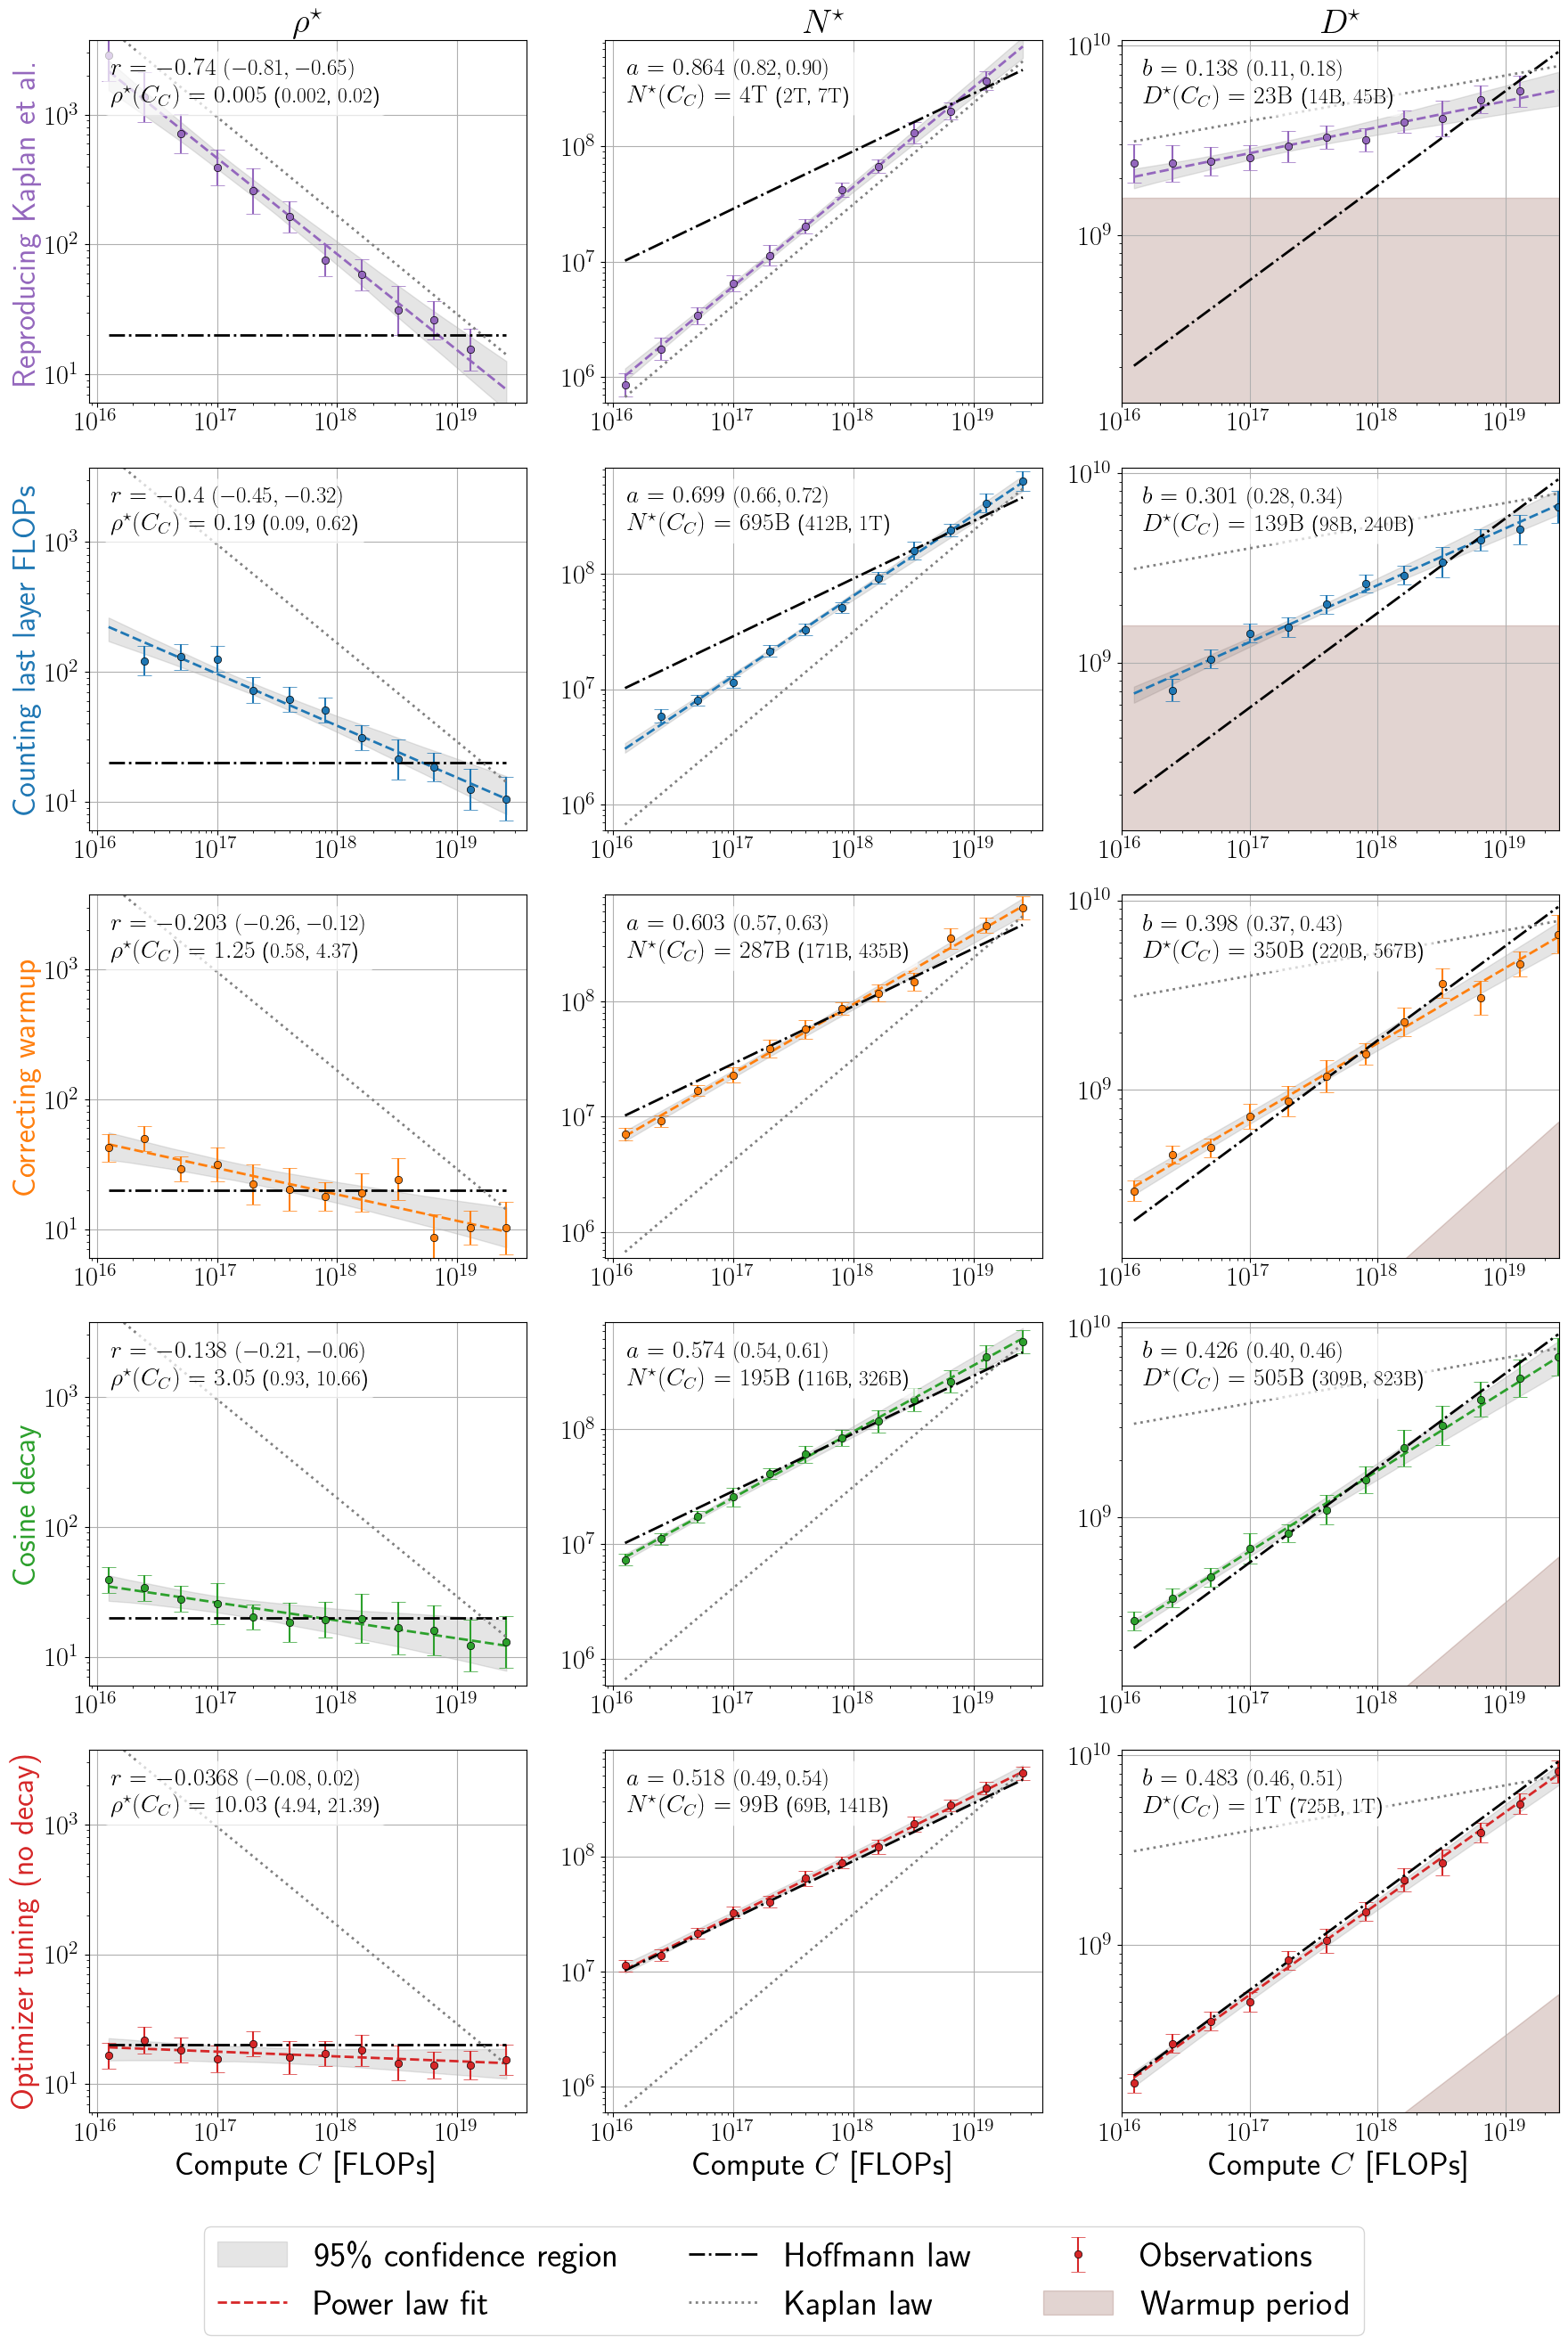

In [16]:
full_results_figure(summary_df_owt2, save=save_figs, configs_to_show=FIGURE1_CONFIGS_OWT2)
plt.show()

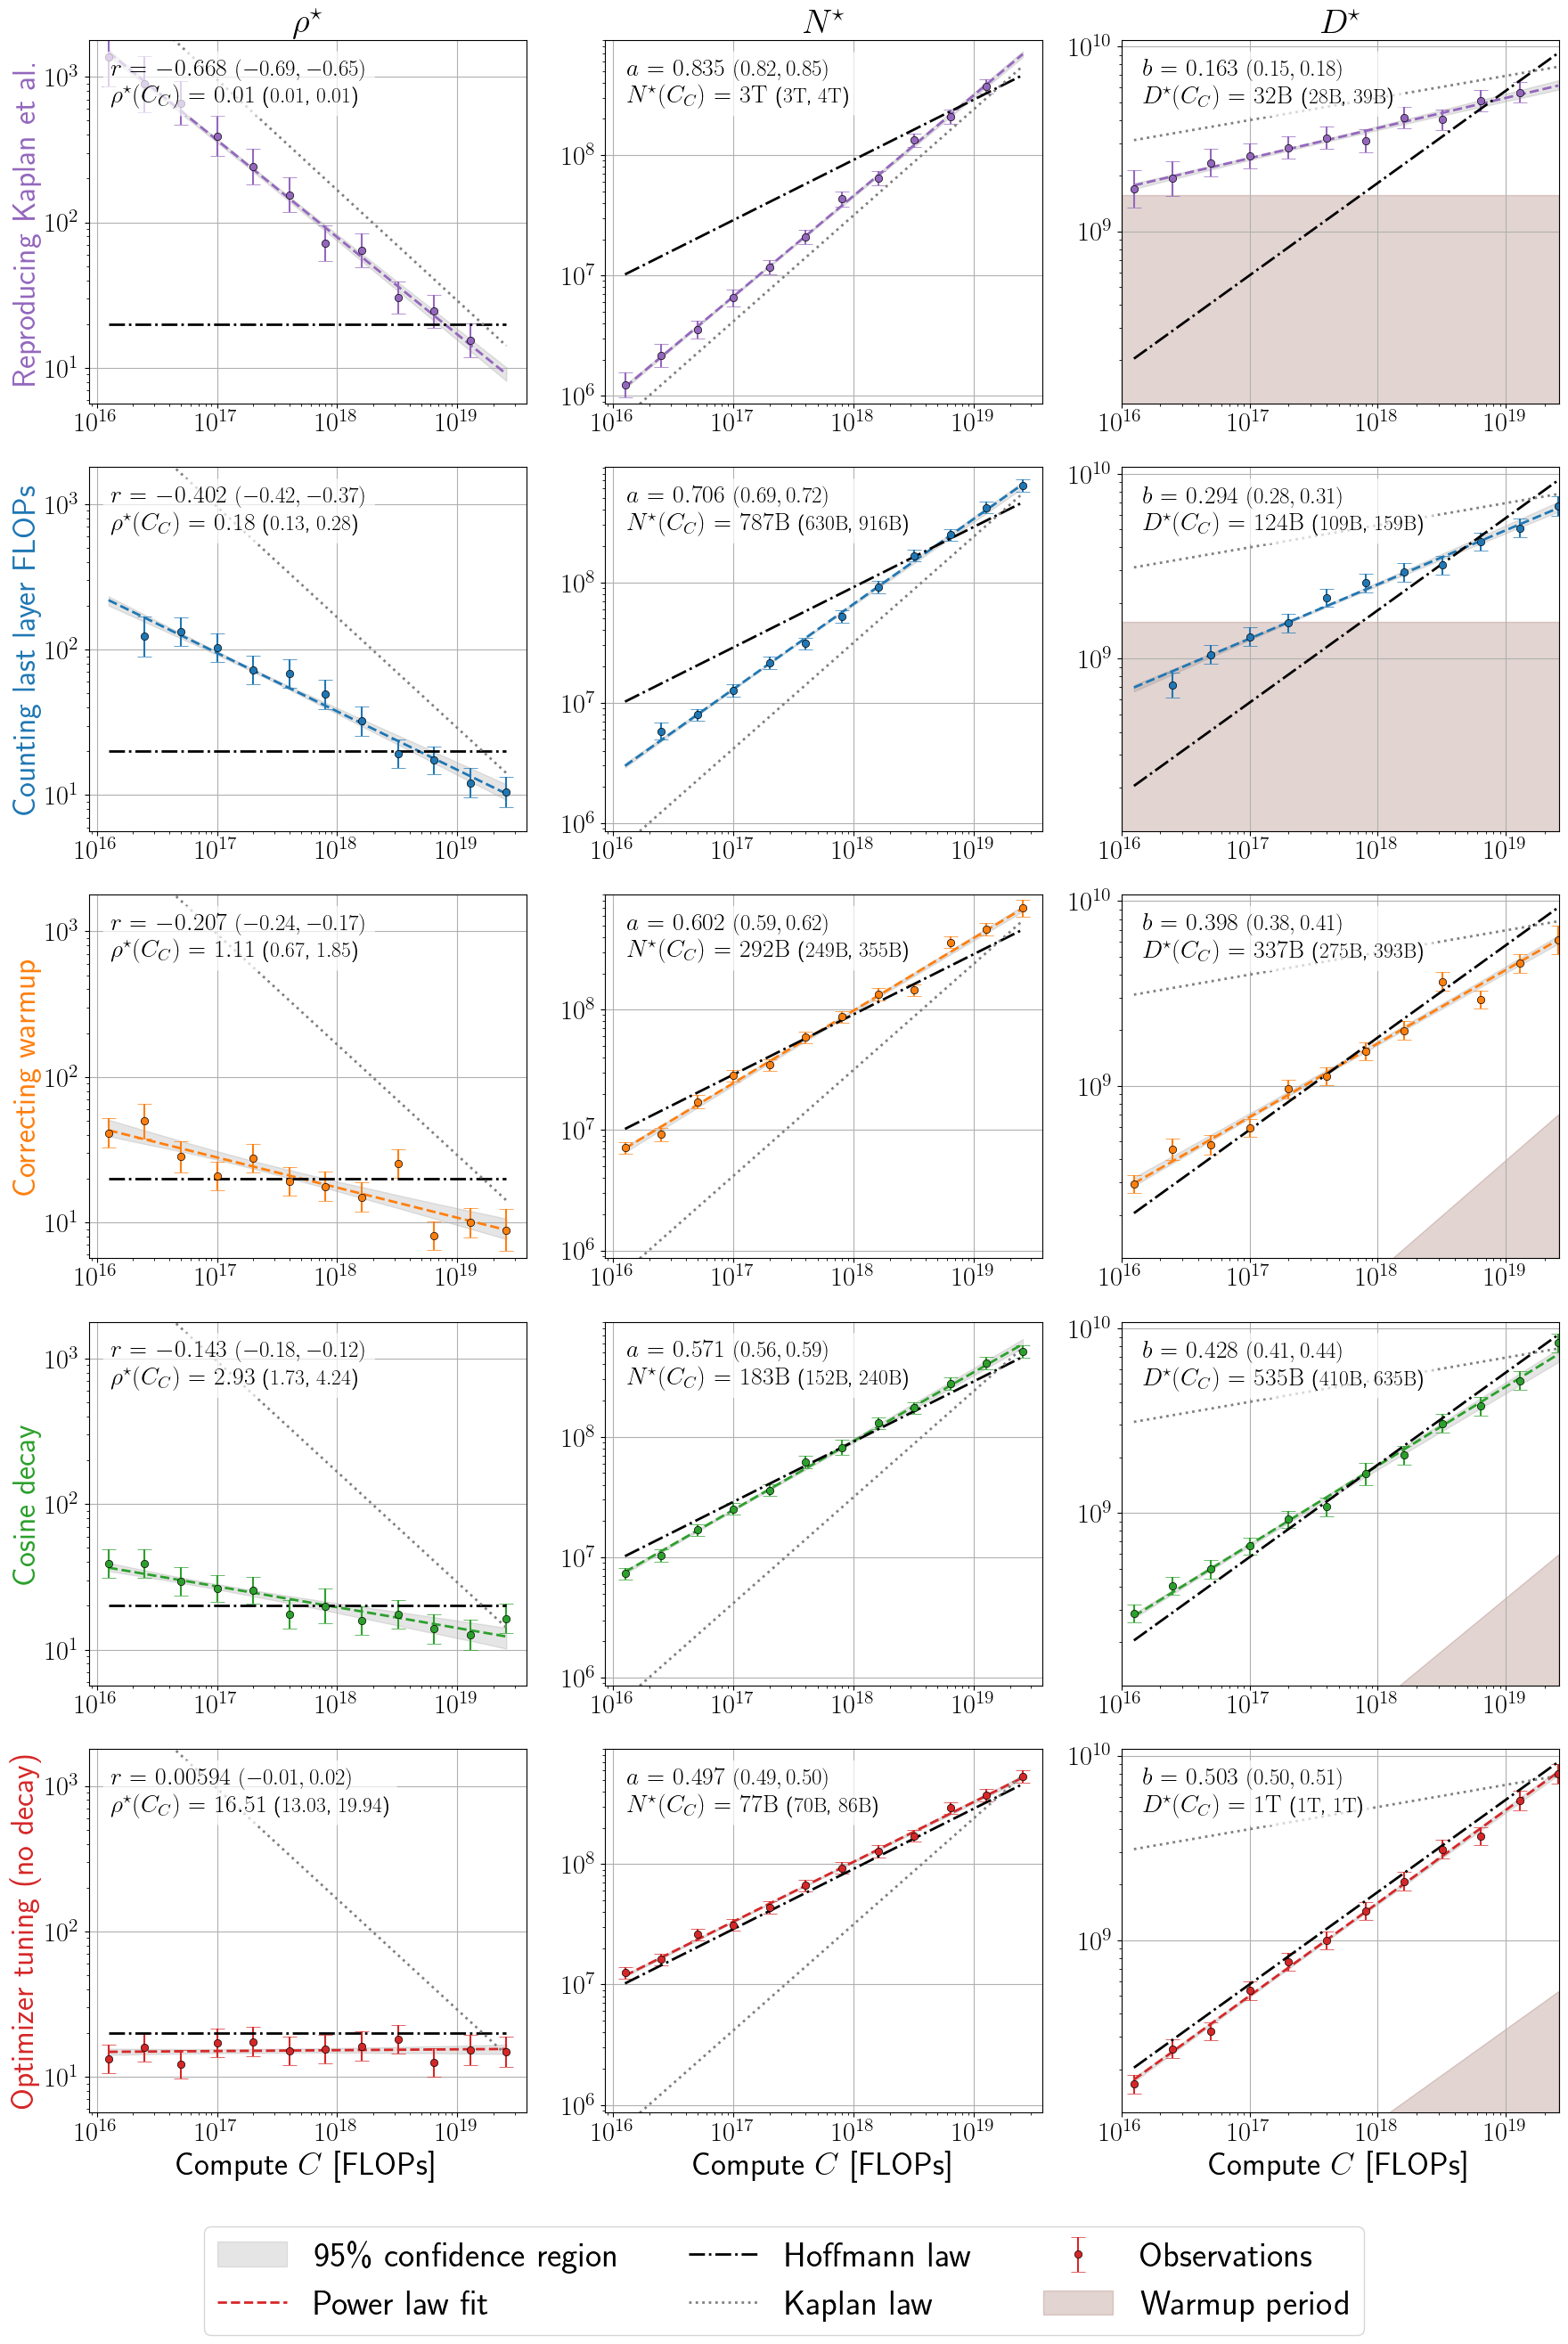

In [17]:
full_results_figure(summary_df, save=save_figs)
plt.show()

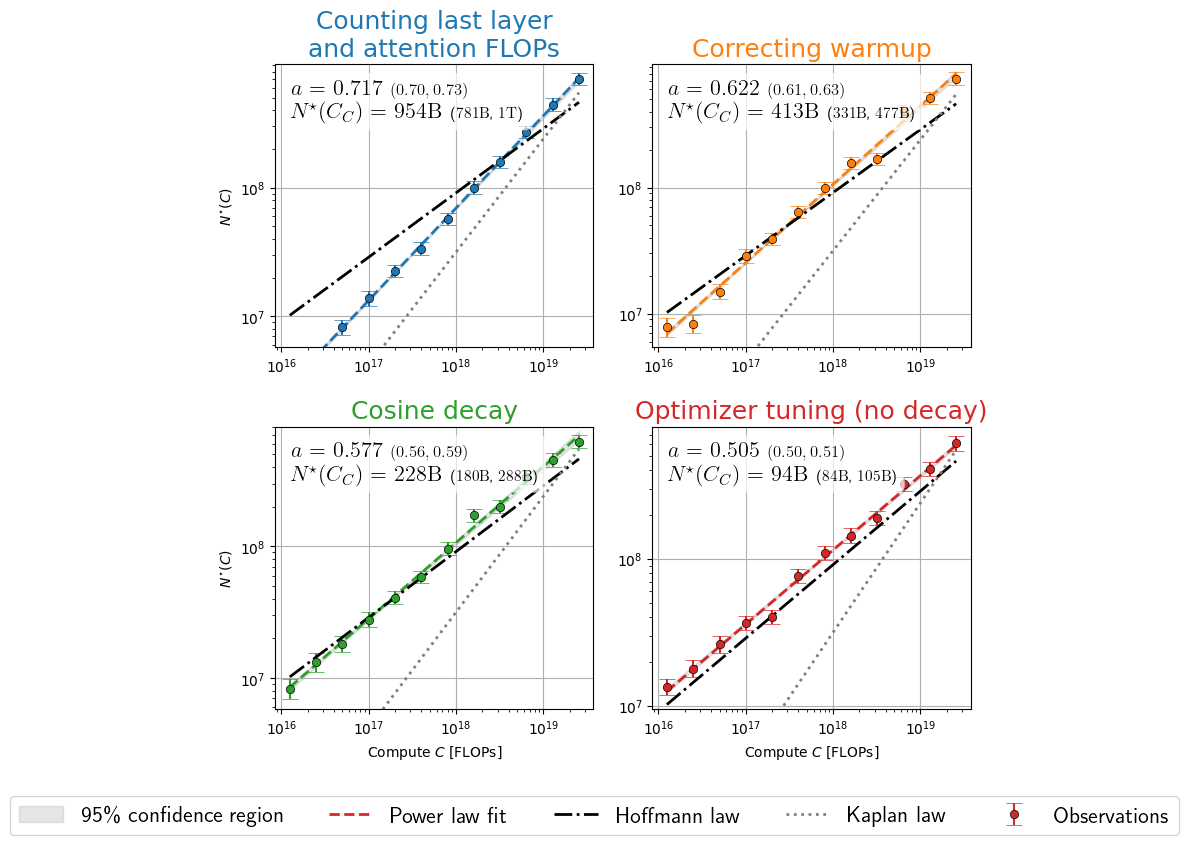

In [18]:
opt_N_with_attention_figure(summary_df_att,save=save_figs)
plt.show()

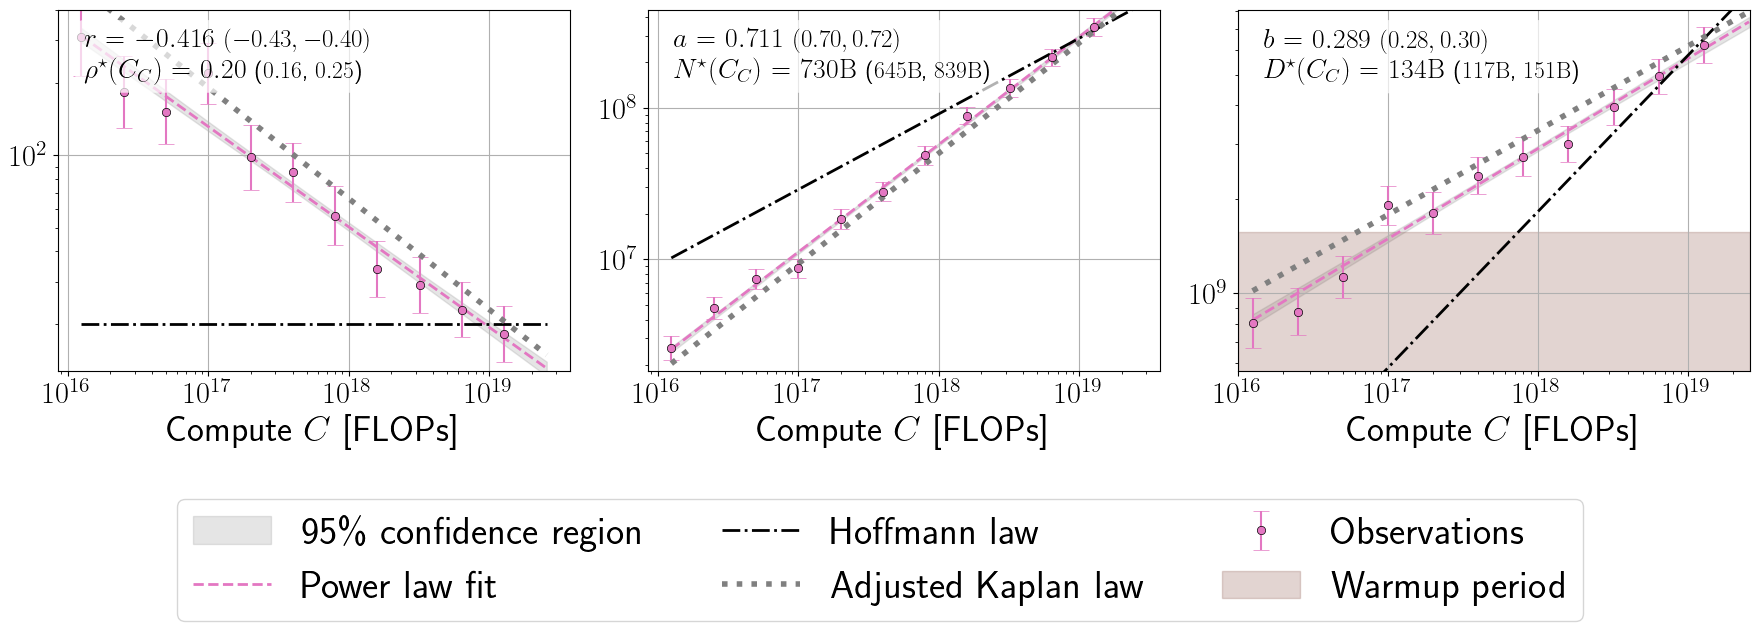

In [19]:
full_results_figure(summary_df_kaplan_tuned_hparams,
    configs_to_show=[('rw', 'tuned', 'long', 'const', 'kaplan', 'train')], save=save_figs, kaplan_adjusted=True)
plt.show()

## Accuracy vs. compute

In [20]:
# takes about 2 minutes
config_compute = ('rw', 'tuned', 'short', 'const', 'standard', 'val')
summary_compute = perform_varying_compute_analysis(df, [2.56e19, 5.76e23], config_compute)

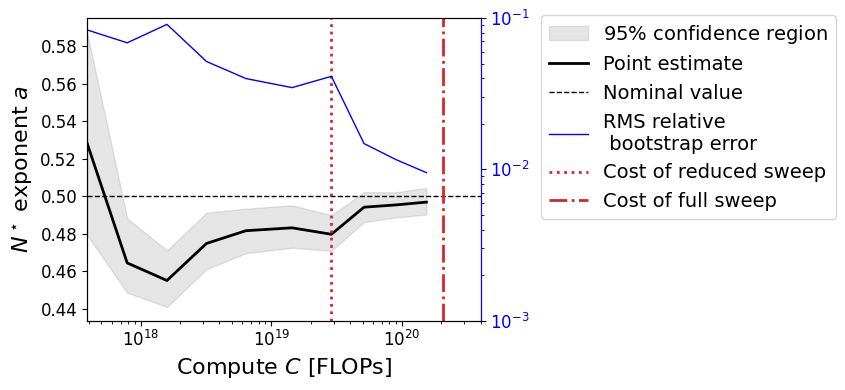

In [21]:
accuracy_vs_compute_figure(summary_compute, save=save_figs)
plt.show()

## Power laws for loss 

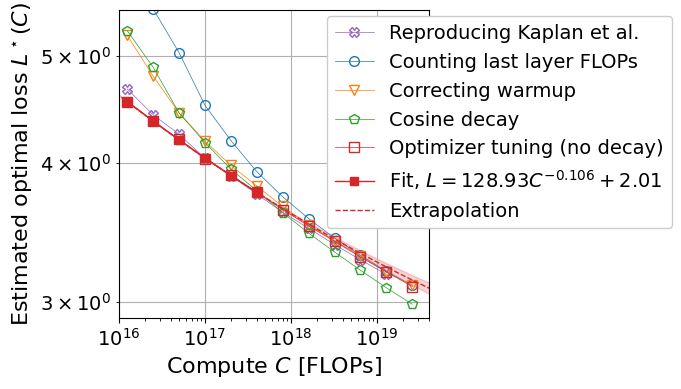

In [22]:
opt_loss_figure(summary_df, save=save_figs, bootstrap_num=0)
plt.show()

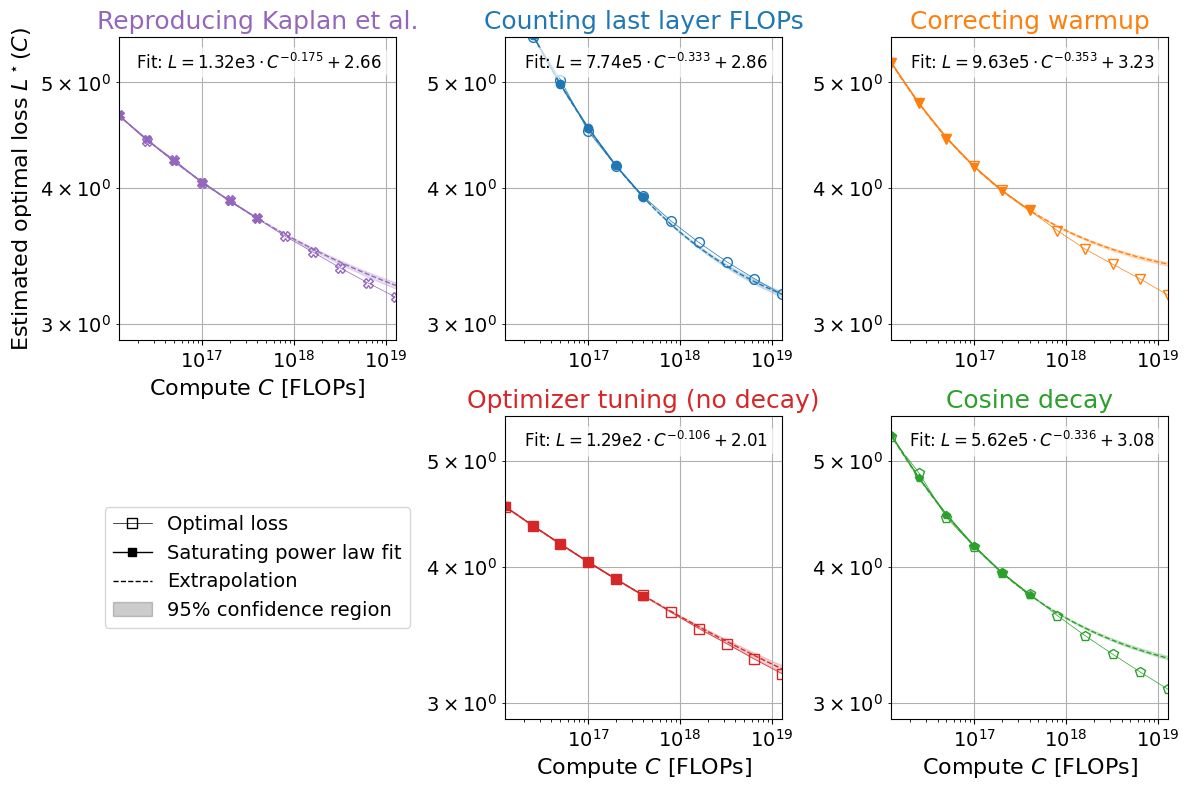

In [23]:
opt_loss_extended_figure(summary_df, save=save_figs, bootstrap_num=200)
plt.show()

## Hyperparameters sweep results

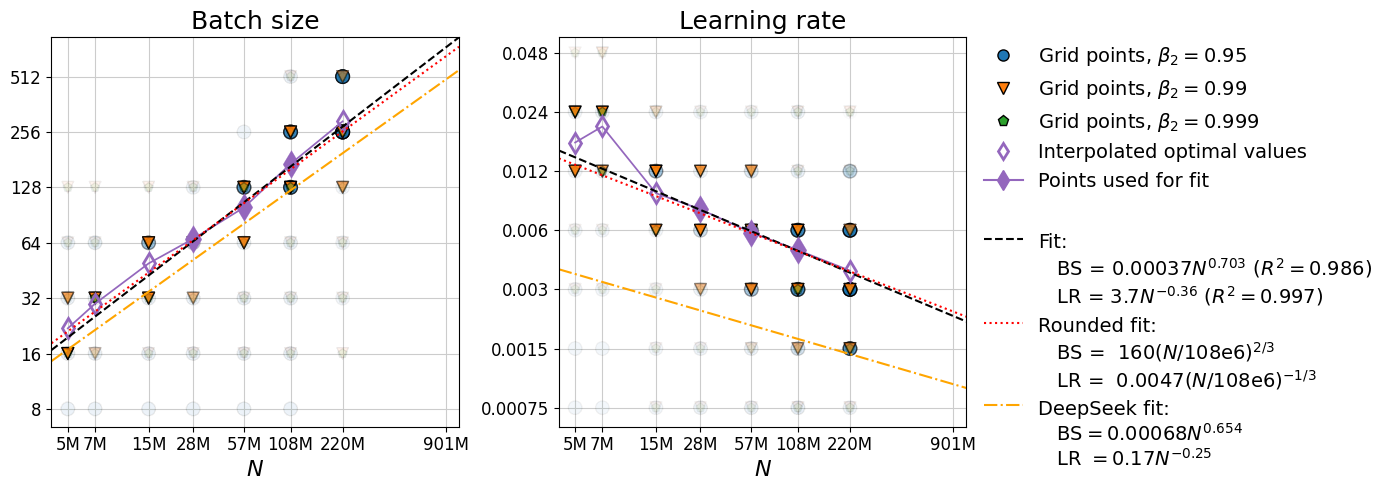

In [24]:
df_sweep_opt_eta_and_bs, fit = get_interpolated_hparams_dfs(df_sweep)

hparams_fit_figure(df_sweep, df_sweep_opt_eta_and_bs, fit, save=save_figs)
plt.show()

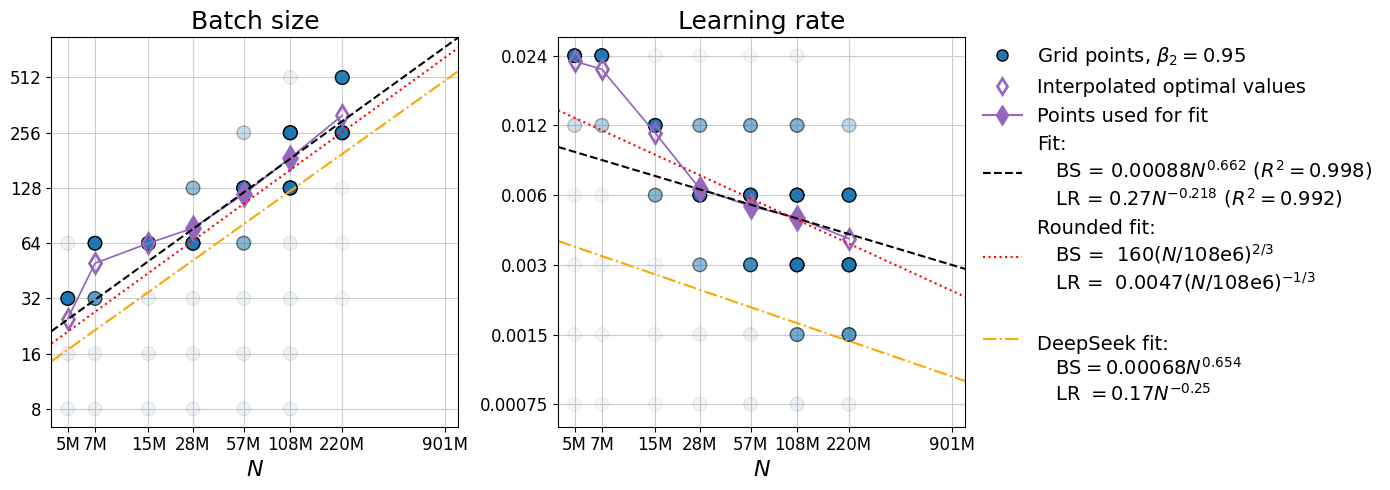

In [25]:
df_sweep_beta2_095 = process_sweep_df(df.query("hparams=='sweep'").query('beta2==0.95').copy())

df_sweep_beta2_095_opt_eta_and_bs, fit_beta095 = get_interpolated_hparams_dfs(df_sweep_beta2_095)

hparams_fit_figure(df_sweep_beta2_095, df_sweep_beta2_095_opt_eta_and_bs, fit_beta095, save=save_figs, save_path='figures/hparams_fit_0.95.pdf')
plt.show()


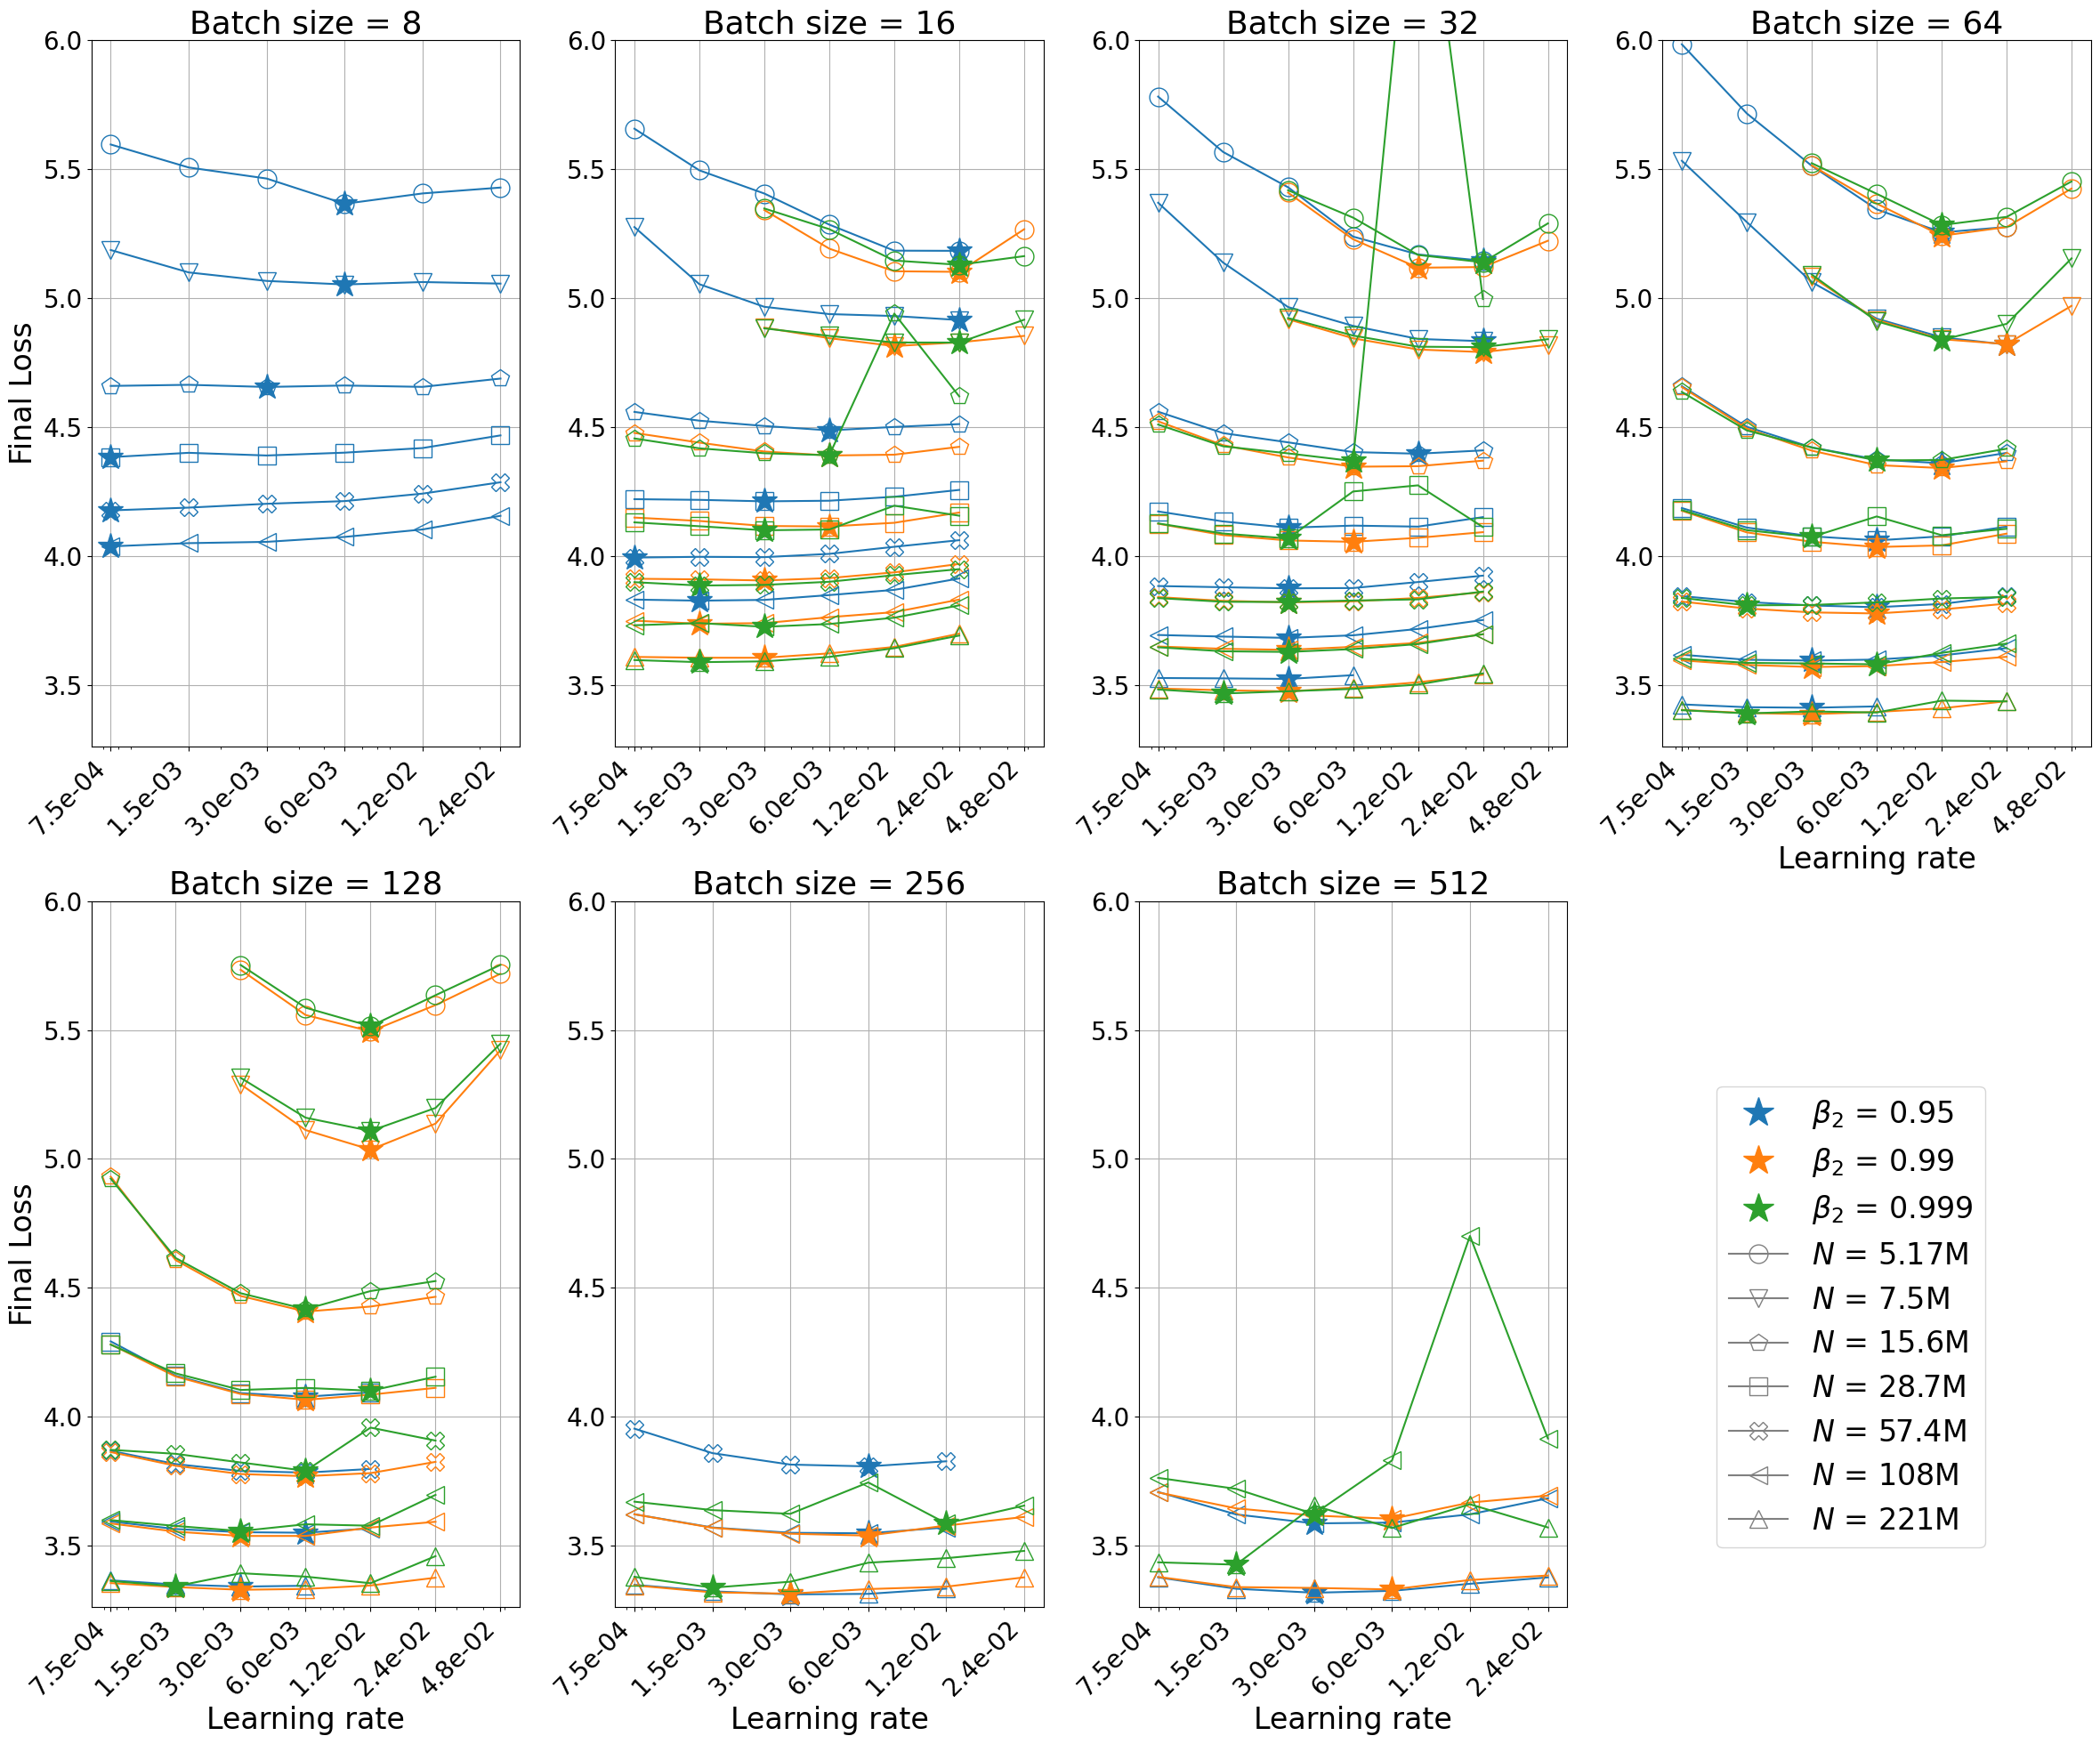

In [26]:
full_sweep_figure(create_pivot_df(df_sweep), save=save_figs)

## Estimation of ideal tuning

In [27]:
params_lr_map = dict(zip(df.query("hparams=='tuned'")['params'], df.query("hparams=='tuned'")['lr']))
params_bs_map = dict(zip(df.query("hparams=='tuned'")['params'], df.query("hparams=='tuned'")['bs']))

In [28]:
df_sweep_mults['lr_star'] = df_sweep_mults['params'].map(params_lr_map)
df_sweep_mults['bs_star'] = df_sweep_mults['params'].map(params_bs_map)
df_sweep_extended, fits_extended = hparams_other_multipliers(df_sweep_mults, multipliers)

In [29]:
fits_N_vs_L_diff = fit_l_star_vs_N_for_M(df_sweep_extended, smoothed=True)

In [30]:
tuning_excess_df, optimal_pairs, fit_results = perform_analysis_with_sweep_data(summary_df.iloc[-1], fits_N_vs_L_diff)

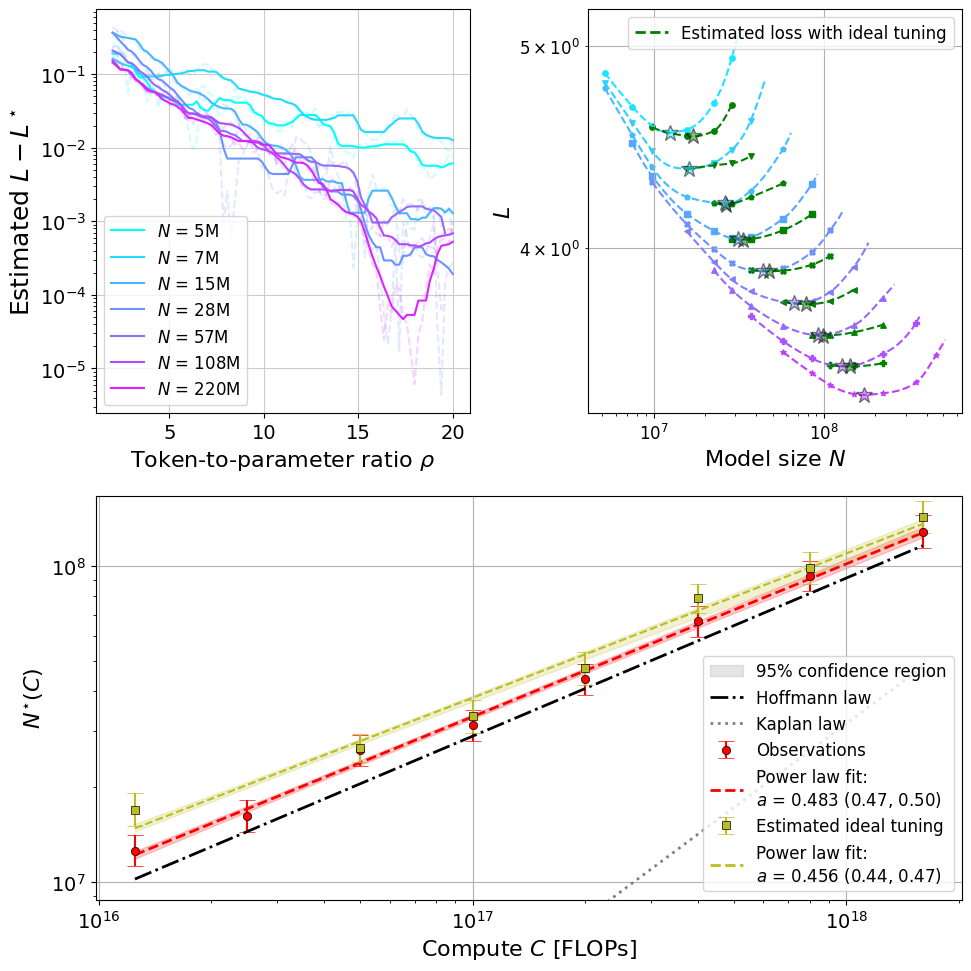

In [31]:
ideal_tuning_figure(summary_df.iloc[-1], summary_compute, df_sweep_extended, tuning_excess_df, optimal_pairs, fit_results, save=save_figs, save_path='figures/ideal_tuning.pdf', flop_vals_tuning=[1.25e16, 1.6e18])

In [32]:
limited_compute = perform_varying_compute_analysis(df, [2.56e19, 5.76e23], config_compute, start_flop=2.4e16)

In [33]:
tuning_excess_df_no_first, optimal_pairs_no_first, fit_results_no_first = perform_analysis_with_sweep_data(summary_df.iloc[-1], fits_N_vs_L_diff, omit_first=True)

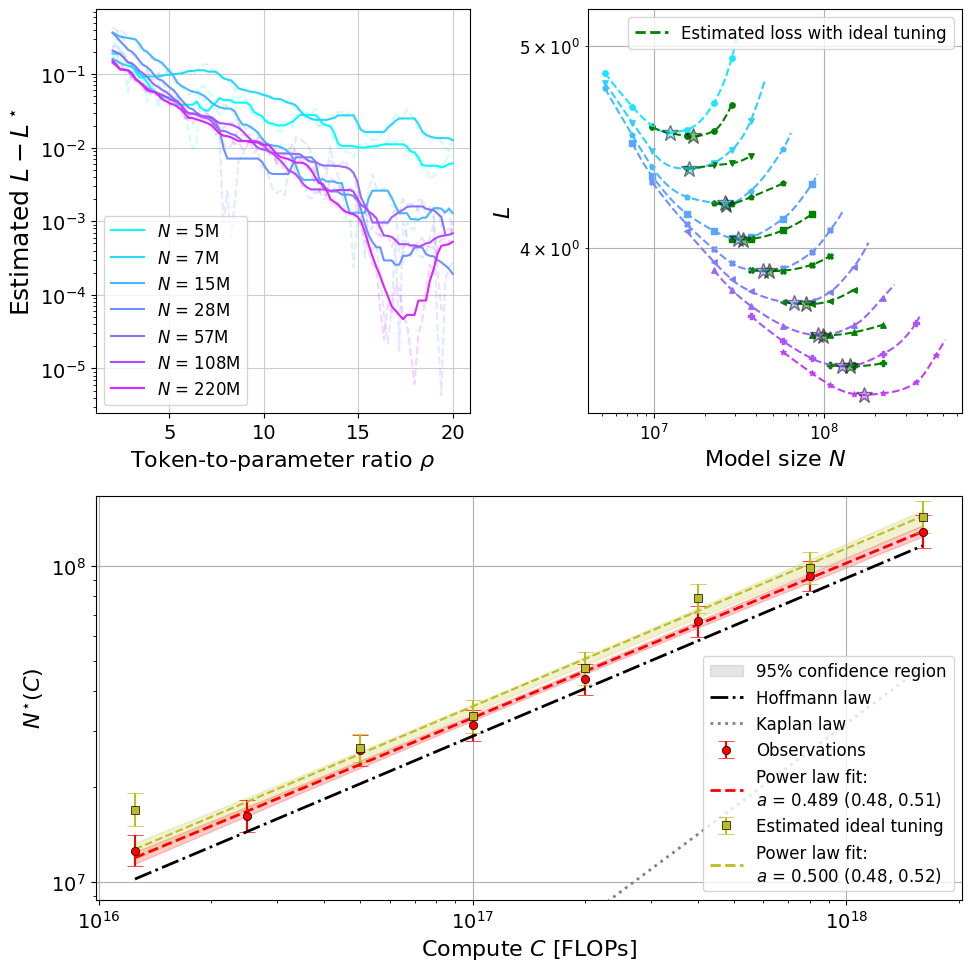

In [34]:
ideal_tuning_figure(summary_df.iloc[-1], limited_compute, df_sweep_extended, tuning_excess_df_no_first, optimal_pairs_no_first, fit_results_no_first, save=False, flop_vals_tuning=[1.25e16, 1.6e18])

## Seed variance plot

In [35]:
seed_df = df.query("hparams=='seed'")
analyzed_seed_df = perform_seed_var_analysis(seed_df)

/workspaces/resolving-scaling-law-discrepancies/paper_figures.py:729: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.plot([], [], ' ', label='Train loss', color='gray', linestyle='-')
/workspaces/resolving-scaling-law-discrepancies/paper_figures.py:731: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.plot([], [], ' ', label='Estimated validation sampling error', color='gray', linestyle='-.')
/workspaces/resolving-scaling-law-discrepancies/paper_figures.py:732: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  plt.plot([], [], ' ', label='Bootstrap noise standard deviation', color='k', linestyle='--')


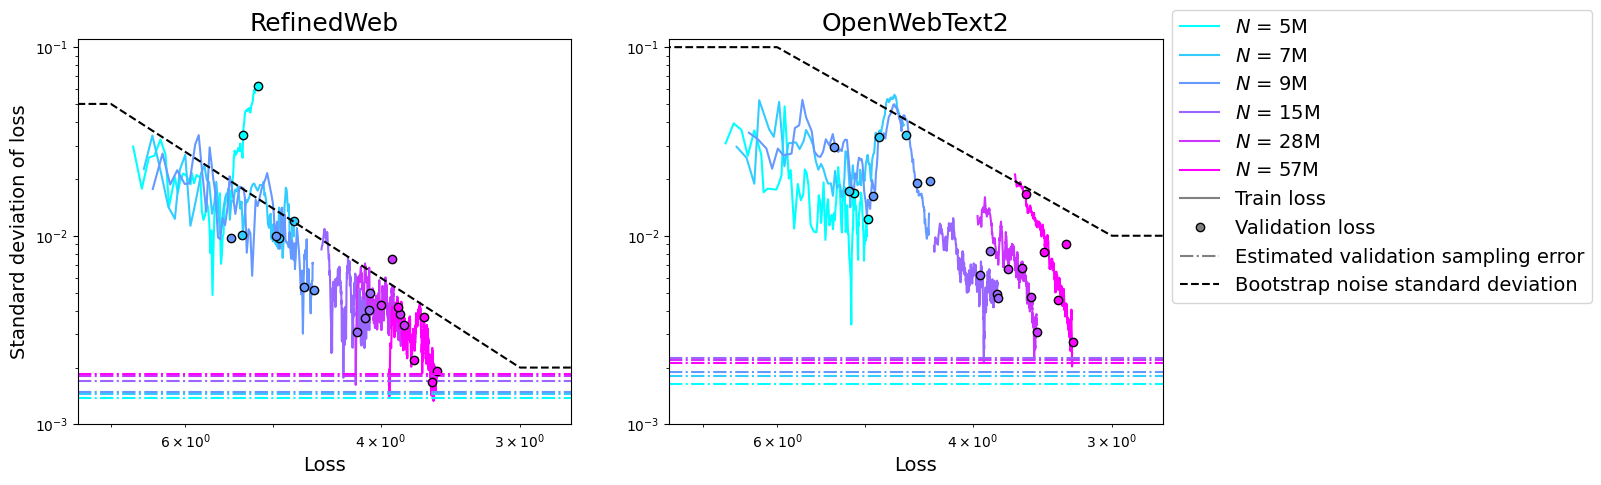

In [36]:
seed_noise_figure(analyzed_seed_df, save=save_figs, save_path='figures/seed_noise.pdf')

## Train loss curves

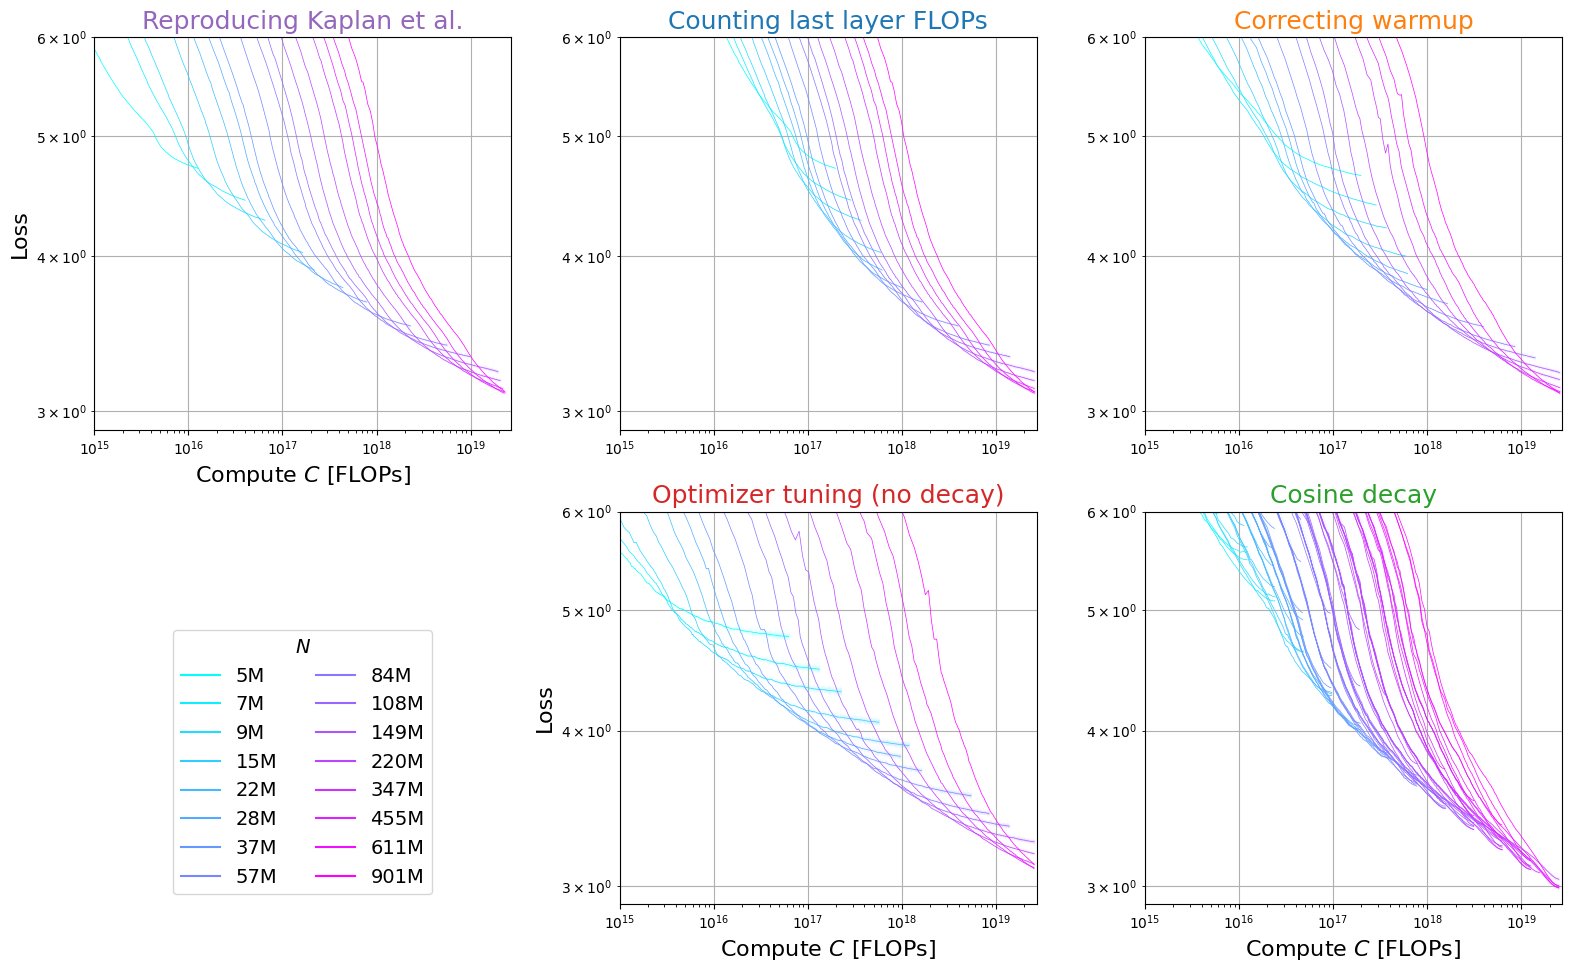

In [37]:
loss_curves_figure(df, save=save_figs, save_path='figures/loss-curves-rw.pdf')

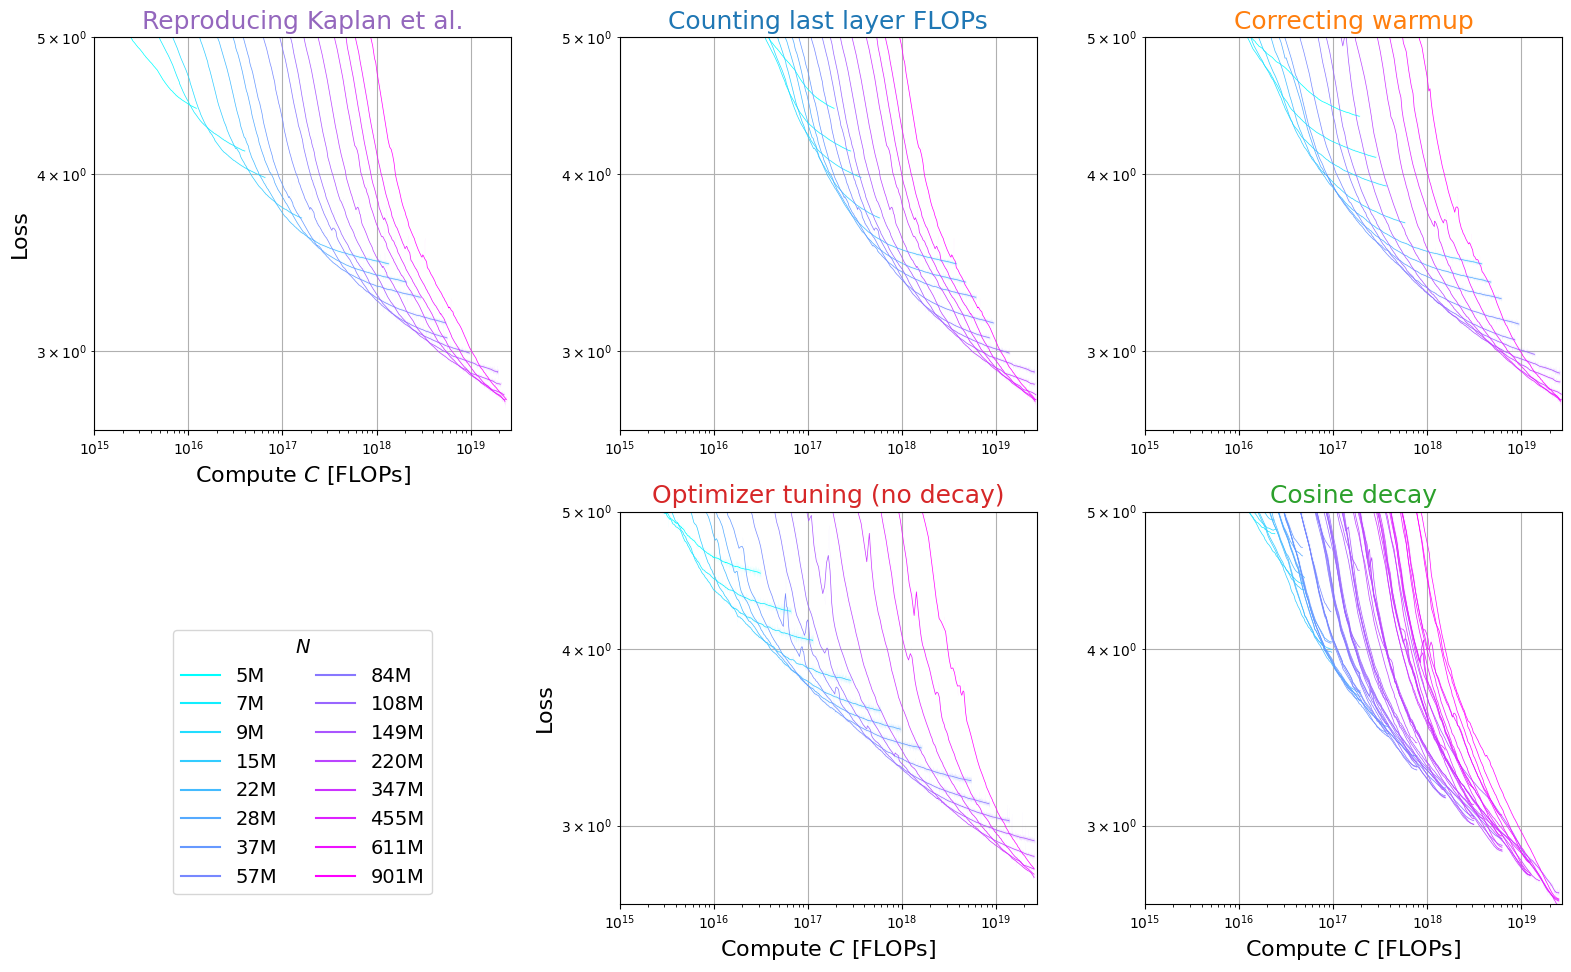

In [38]:
loss_curves_figure(df, save=save_figs, save_path='figures/loss-curves-owt2.pdf', configs_to_show=FIGURE1_CONFIGS_OWT2, ylim=[2.64,5])

# Tables

In [39]:
results_table_df = results_table(pd.concat([summary_df, summary_df_owt2]), flop_vals=FLOP_VALS, validation='all')

In [40]:
results_table_df.loc[len(results_table_df)] = results_table(summary_df_kaplan_tuned_hparams, flop_vals=FLOP_VALS, validation='all').iloc[0]
results_table_df.loc[-1] = ["Kaplan Law", "WebText2", "0.88", "", ""]
results_table_df.loc[-2] = ["Hoffmann Law", "MassiveText", "0.5", "", ""]
results_table_df.index = results_table_df.index + 2
results_table_df = results_table_df.sort_index()


In [41]:
results_table_df

Experiment       Dataset      $a$ estimation  \
0                  Hoffmann Law   MassiveText                 0.5   
1                    Kaplan Law      WebText2                0.88   
2     Reproducing Kaplan et al.  OpenWebText2  0.864 (0.82, 0.90)   
3     Reproducing Kaplan et al.    RefinedWeb  0.835 (0.82, 0.85)   
4     Counting last layer FLOPs  OpenWebText2  0.699 (0.66, 0.72)   
5     Counting last layer FLOPs    RefinedWeb  0.706 (0.69, 0.72)   
6             Correcting warmup  OpenWebText2  0.603 (0.57, 0.63)   
7             Correcting warmup    RefinedWeb  0.602 (0.59, 0.62)   
8                  Cosine decay  OpenWebText2  0.574 (0.54, 0.61)   
9                  Cosine decay    RefinedWeb  0.571 (0.56, 0.59)   
10  Optimizer tuning (no decay)  OpenWebText2  0.518 (0.49, 0.54)   
11  Optimizer tuning (no decay)    RefinedWeb  0.497 (0.49, 0.50)   
12              Kaplan Adjusted    RefinedWeb  0.711 (0.70, 0.72)   

   $R^2$ of $a$ fit $\rho^\star$ range  
0                                       
1                                       
2             0.998          (5, 2617)  
3             0.999          (8, 1536)  
4             0.998           (8, 262)  
5             0.998           (9, 232)  
6             0.994            (7, 55)  
7             0.993            (7, 50)  
8             0.999            (7, 42)  
9             0.998           (10, 39)  
10            0.998           (11, 22)  
11            0.997           (14, 16)  
12            0.996          (12, 337)

In [42]:
tuned_hparams(df.query('dataset=="rw" and hparams=="tuned" and warmup=="short"')).sort_values('Batch size')

$\params$ Learning rate  Batch size eta_2
1          5         0.013        20.0   0.99
3          7         0.011        28.0   0.99
0          9         0.011        32.0   0.99
2         15         0.009        44.0   0.99
4         22         0.008        56.0   0.99
15        28        0.0074        64.0   0.99
14        37        0.0068        80.0   0.99
13        57        0.0059       104.0   0.99
5         84        0.0051       128.0   0.99
6        108        0.0047       160.0   0.99
8        149        0.0043       192.0   0.99
11       220        0.0038       256.0   0.95
12       347        0.0032       320.0   0.95
10       455         0.003       448.0   0.95
7        611        0.0027       512.0   0.95
9        901        0.0024       640.0   0.95

In [43]:
archs_table_df = archs_table(df.query('dataset=="rw" and hparams=="tuned" and warmup=="short"'))